### Data Dictionary


1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi
from feature_engine.outlier_removers import Winsorizer

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.


### Data Exploration

In [2]:
df = pd.read_csv("automobile.csv",low_memory=False)

In [3]:
df

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   normalizedlosses  205 non-null    object 
 2   make              205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   numofdoors        205 non-null    object 
 6   bodystyle         205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  numofcylinders    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,symboling,wheelbase,length,width,height,curbweight,enginesize,compressionratio,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
df.shape

(205, 26)

### Data Visualization

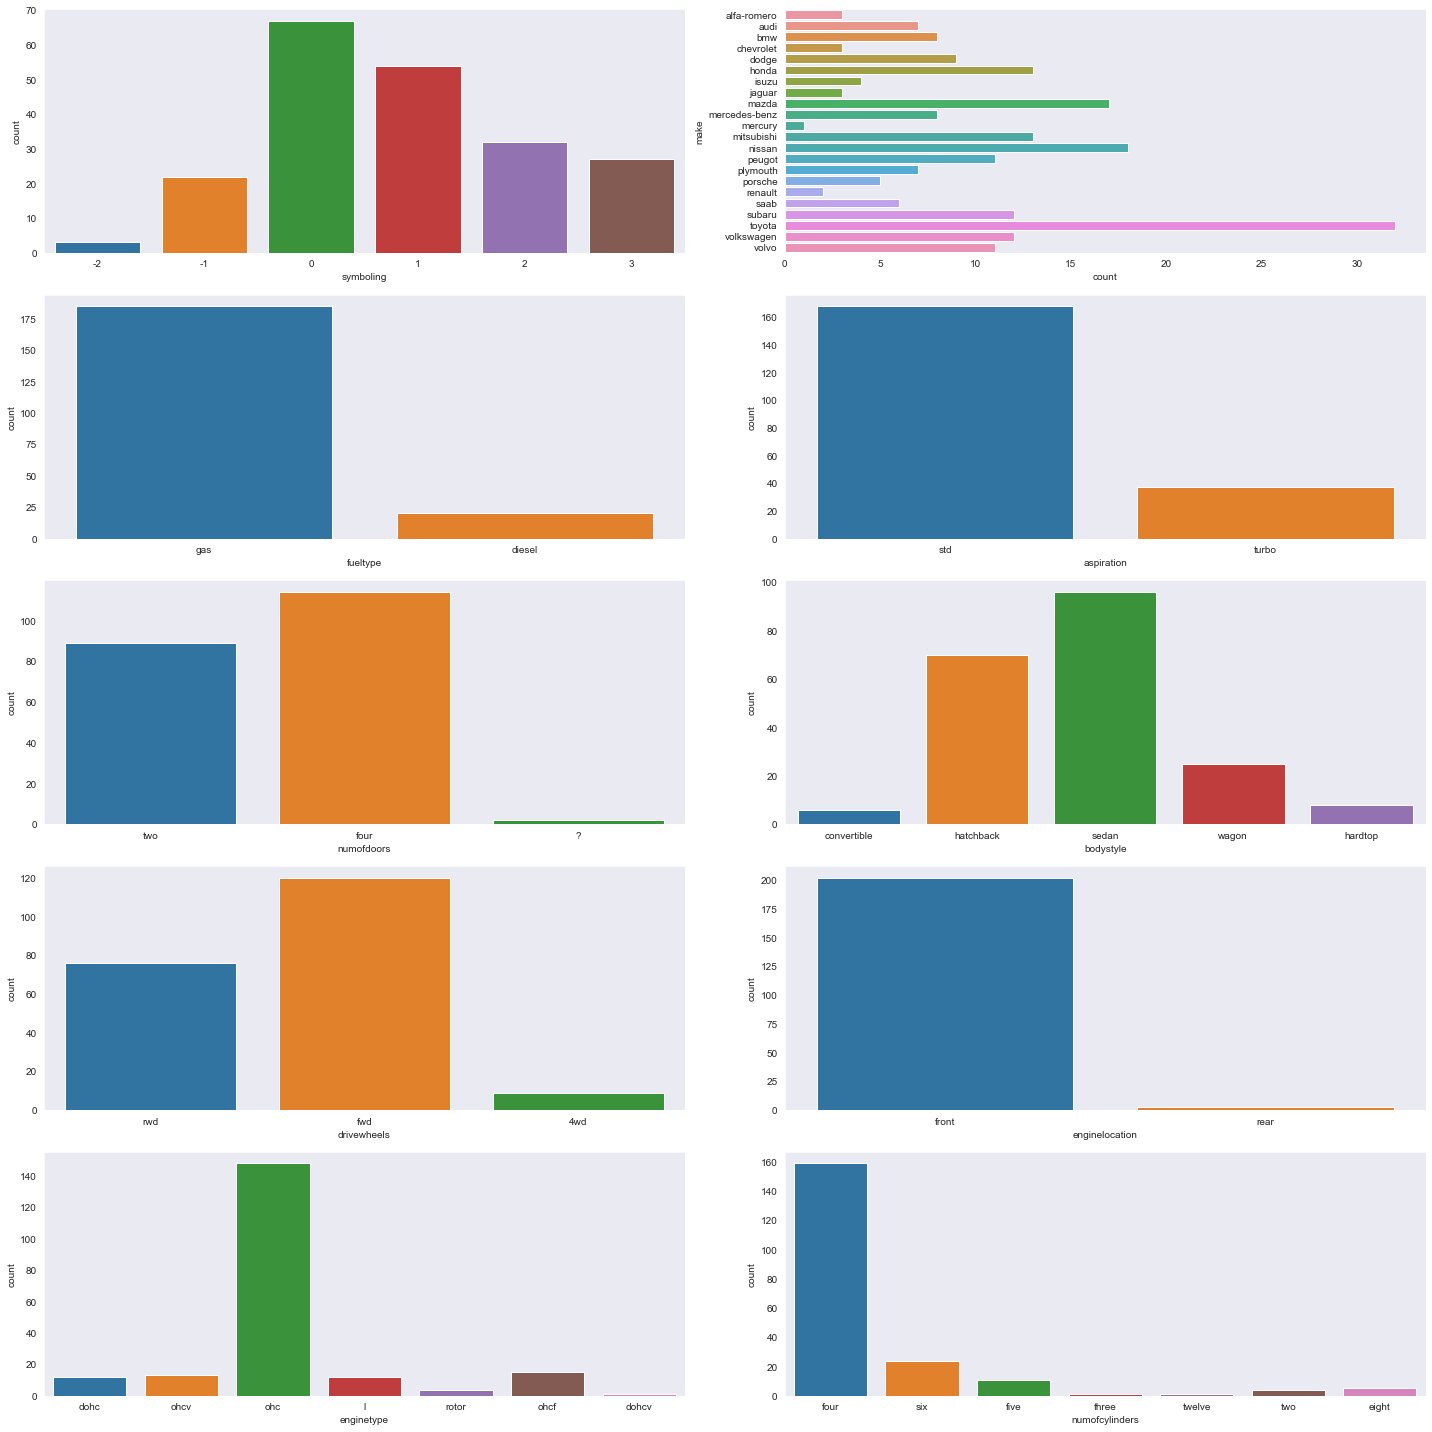

In [7]:
fig = plt.figure(figsize=(20,20))

plt.subplot(5,2,1)
sns.countplot(df.symboling)
plt.subplot(5,2,2)
sns.countplot(y=df.make)
plt.subplot(5,2,3)
sns.countplot(df.fueltype)
plt.subplot(5,2,4)
sns.countplot(df.aspiration)
plt.subplot(5,2,5)
sns.countplot(df.numofdoors)
plt.subplot(5,2,6)
sns.countplot(df.bodystyle)
plt.subplot(5,2,7)
sns.countplot(df.drivewheels)
plt.subplot(5,2,8)
sns.countplot(df.enginelocation)
plt.subplot(5,2,9)
sns.countplot(df.enginetype)
plt.subplot(5,2,10)
sns.countplot(df.numofcylinders)

plt.tight_layout()
plt.show()

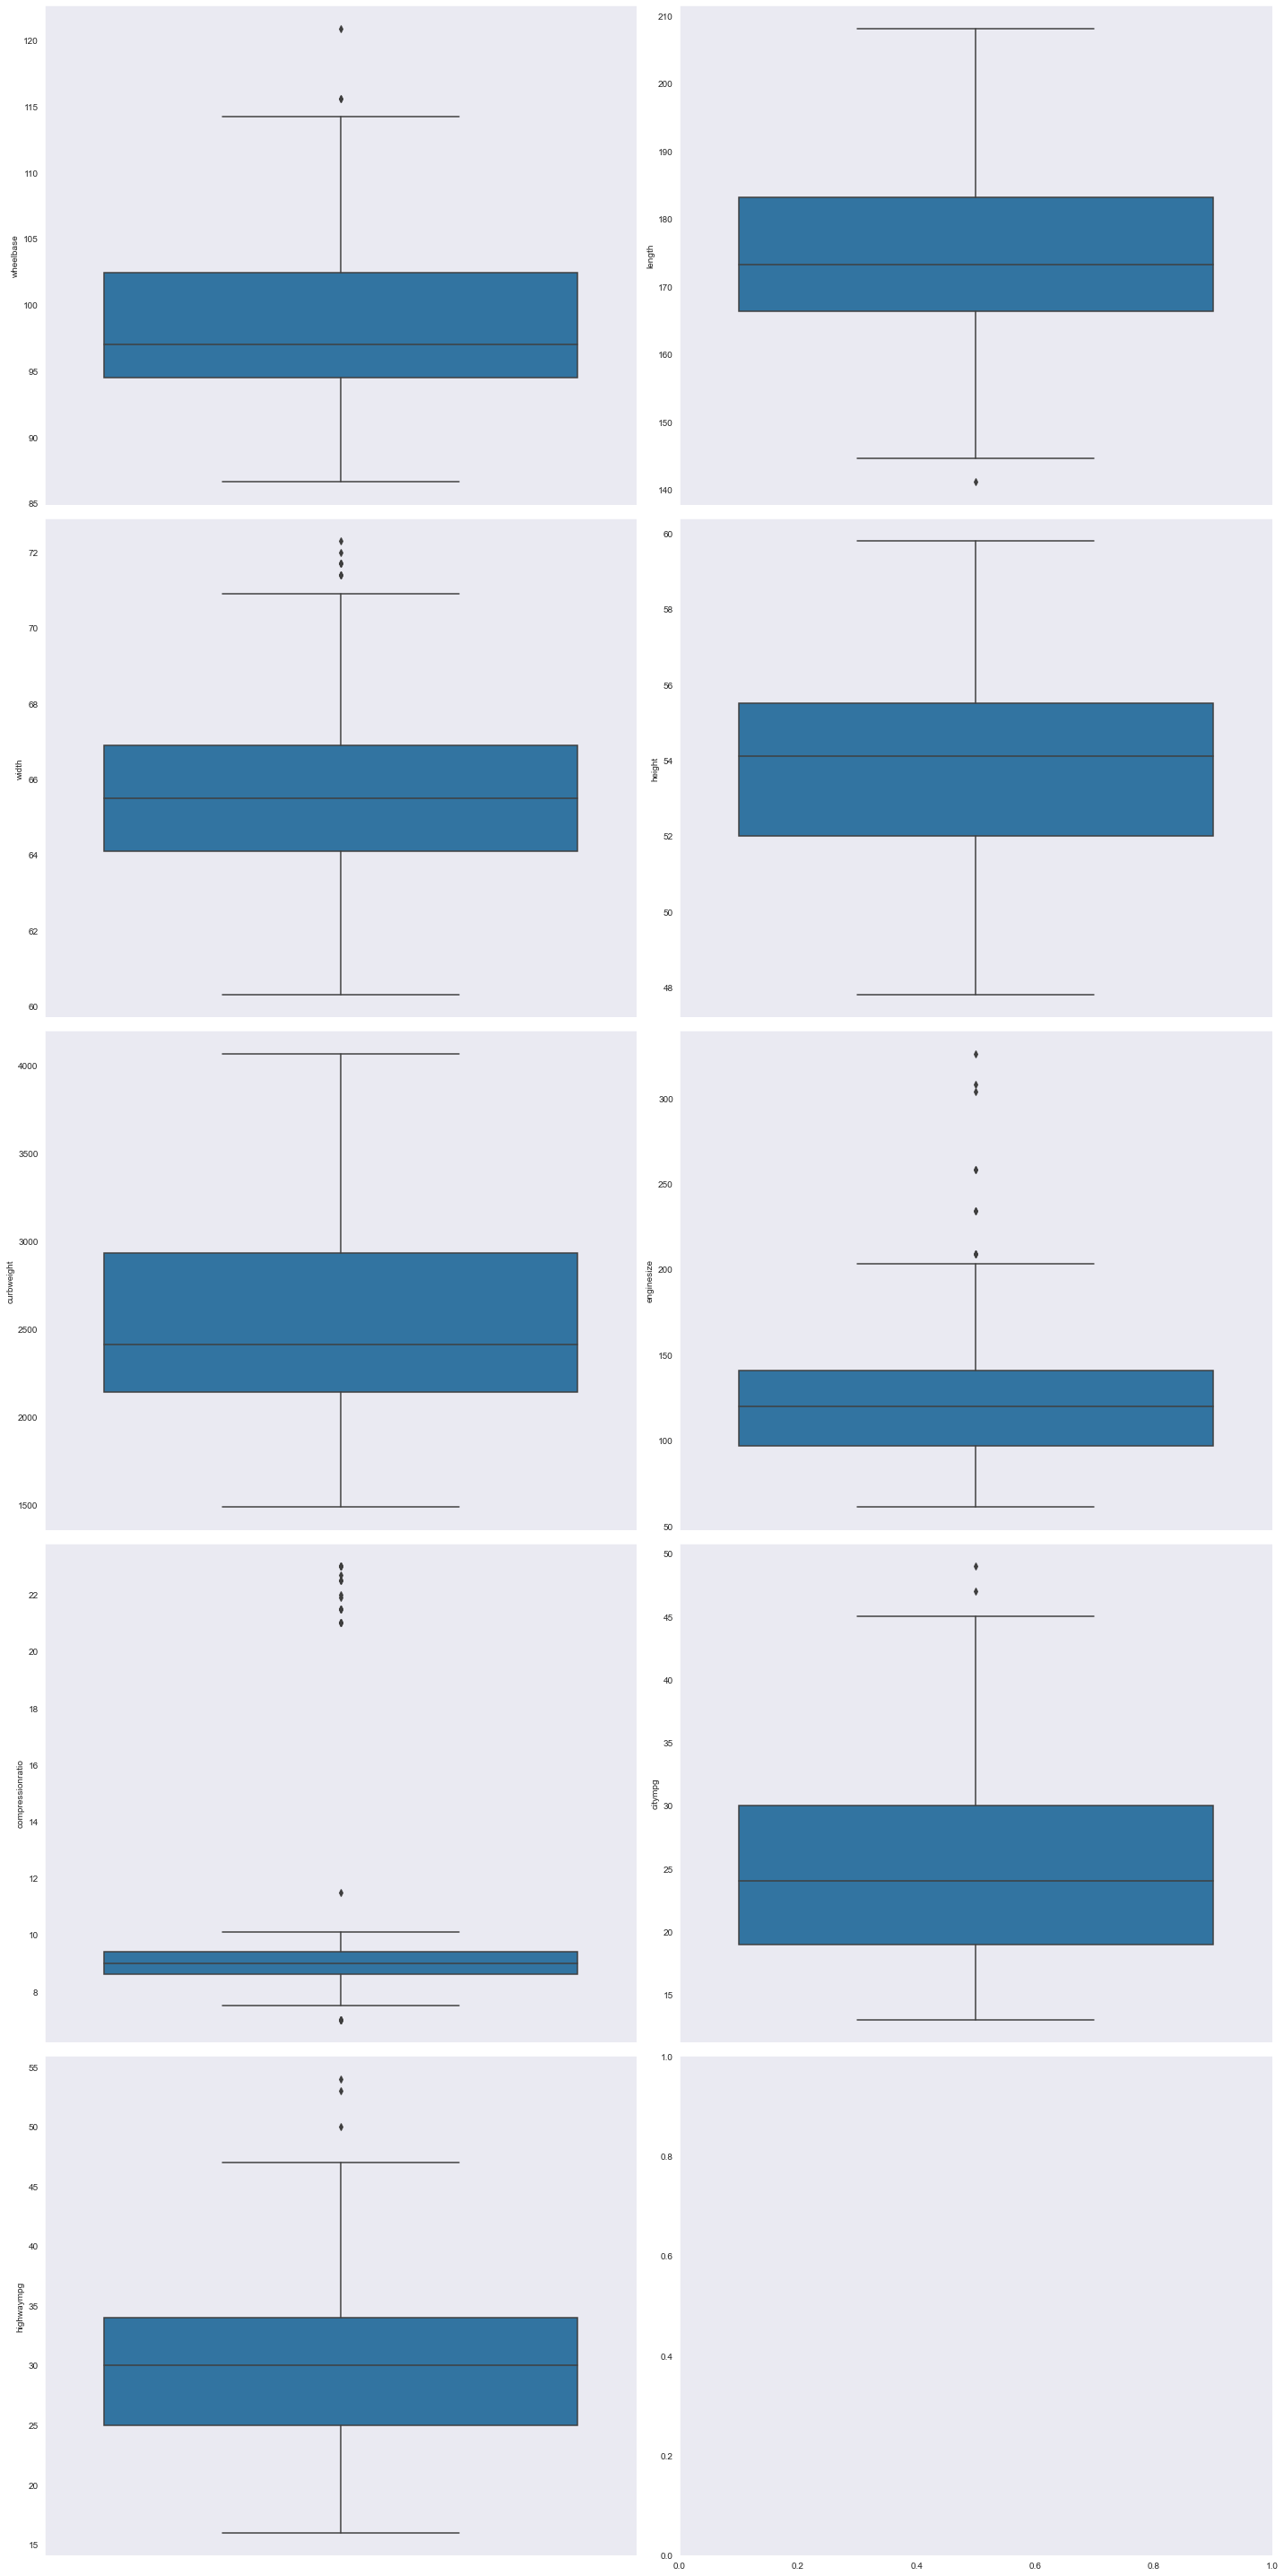

In [8]:
fig = plt.figure(figsize=(20,40))

plt.subplot(5,2,1)
sns.boxplot(y=df.wheelbase)
plt.subplot(5,2,2)
sns.boxplot(y=df.length)
plt.subplot(5,2,3)
sns.boxplot(y=df.width)
plt.subplot(5,2,4)
sns.boxplot(y=df.height)
plt.subplot(5,2,5)
sns.boxplot(y=df.curbweight)
plt.subplot(5,2,6)
sns.boxplot(y=df.enginesize)
plt.subplot(5,2,7)
sns.boxplot(y=df.compressionratio)
plt.subplot(5,2,8)
sns.boxplot(y=df.citympg)
plt.subplot(5,2,9)
sns.boxplot(y=df.highwaympg)
plt.subplot(5,2,10)
#sns.boxplot(y=df.price)

plt.tight_layout()
plt.show()

In [9]:
df.corr()

,symboling,wheelbase,length,width,height,curbweight,enginesize,compressionratio,citympg,highwaympg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
citympg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highwaympg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


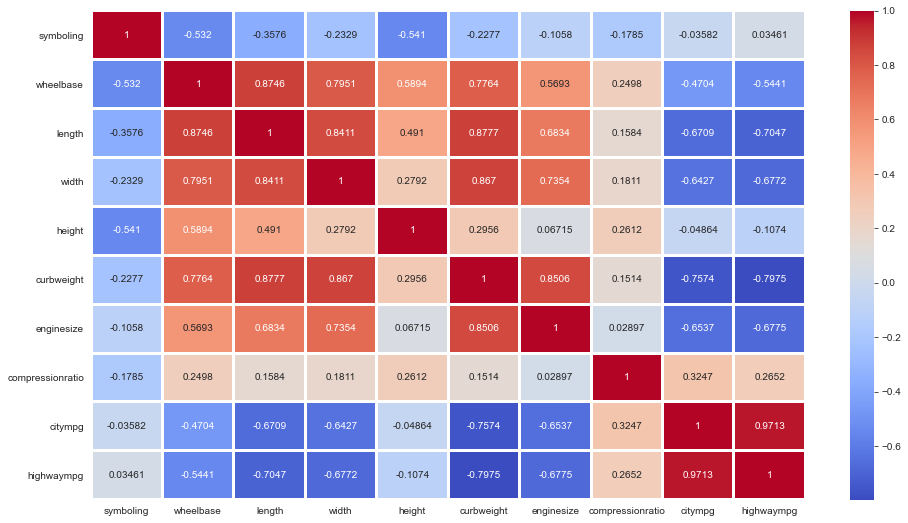

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.4g',linewidths=2)
plt.show()

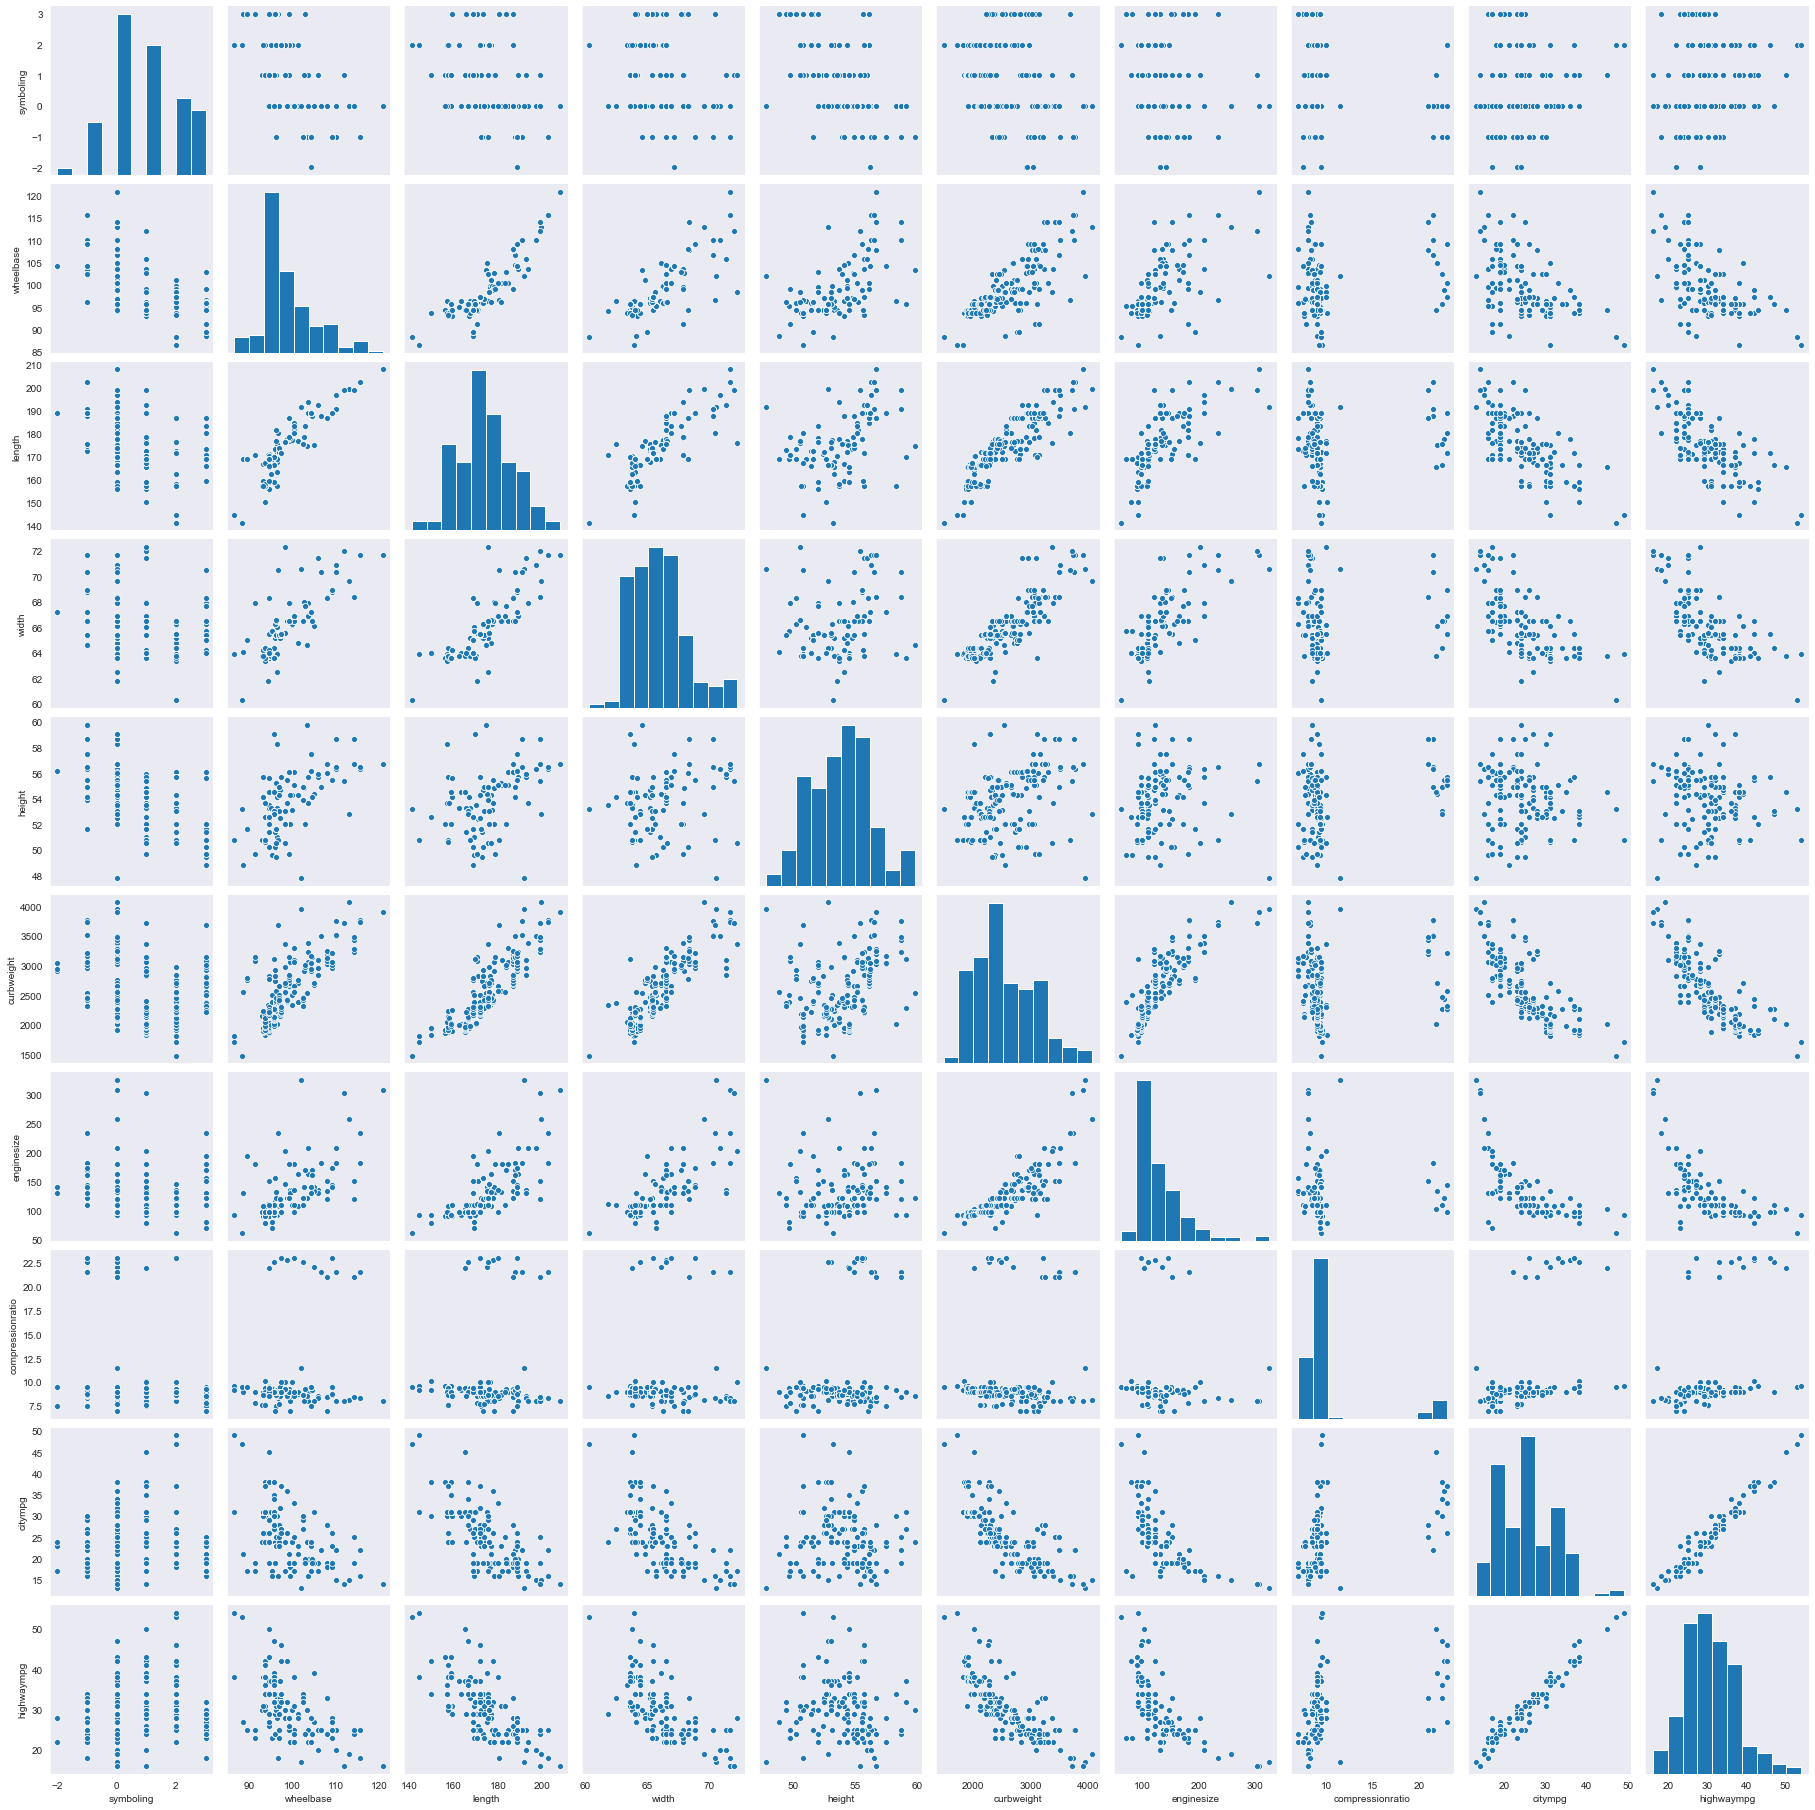

In [11]:
sns.pairplot(df)
plt.show()

### Need to treat ? values with imputation 

### Data Preprocessing

### Treat Missing Values

In [12]:
df.isnull().sum()

symboling           0
normalizedlosses    0
make                0
fueltype            0
aspiration          0
numofdoors          0
bodystyle           0
drivewheels         0
enginelocation      0
wheelbase           0
length              0
width               0
height              0
curbweight          0
enginetype          0
numofcylinders      0
enginesize          0
fuelsystem          0
bore                0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Treat unknown values

In [13]:
df

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [14]:
df['normalizedlosses'].value_counts()

?      41
161    11
91      8
150     7
104     6
128     6
134     6
95      5
94      5
74      5
65      5
102     5
103     5
168     5
85      5
93      4
148     4
118     4
122     4
106     4
115     3
154     3
137     3
83      3
125     3
101     3
192     2
164     2
119     2
197     2
89      2
81      2
145     2
158     2
129     2
113     2
110     2
188     2
87      2
153     2
194     2
108     2
77      1
78      1
98      1
90      1
186     1
256     1
231     1
107     1
142     1
121     1
Name: normalizedlosses, dtype: int64

In [15]:
df['normalizedlosses'].replace(to_replace='?',value=100,inplace=True)

In [16]:
df['normalizedlosses'].value_counts()

100    41
161    11
91      8
150     7
104     6
128     6
134     6
95      5
94      5
74      5
65      5
102     5
103     5
168     5
85      5
93      4
148     4
118     4
122     4
106     4
115     3
154     3
137     3
83      3
125     3
101     3
192     2
164     2
119     2
197     2
89      2
81      2
145     2
158     2
129     2
113     2
110     2
188     2
87      2
153     2
194     2
108     2
77      1
78      1
98      1
90      1
186     1
256     1
231     1
107     1
142     1
121     1
Name: normalizedlosses, dtype: int64

In [17]:
df['numofdoors'].value_counts()

four    114
two      89
?         2
Name: numofdoors, dtype: int64

In [18]:
df['numofdoors'].replace(to_replace='?',value='four',inplace=True)

In [19]:
df['numofdoors'].value_counts()

four    116
two      89
Name: numofdoors, dtype: int64

In [20]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [21]:
df['enginetype'].replace(to_replace='l',value='ohc',inplace=True)

In [22]:
df['enginetype'].value_counts()

ohc      160
ohcf      15
ohcv      13
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [23]:
df['bore'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    12
3.46     9
3.31     8
3.78     8
3.43     8
2.91     7
3.27     7
3.05     6
3.54     6
3.39     6
3.58     6
3.01     5
3.7      5
?        4
3.35     4
3.59     3
3.74     3
3.17     3
3.63     2
3.5      2
3.8      2
3.33     2
3.94     2
3.24     2
3.47     2
3.13     2
3.34     1
3.61     1
2.99     1
3.08     1
2.54     1
3.6      1
3.76     1
2.92     1
2.68     1
Name: bore, dtype: int64

In [24]:
df['bore'].replace(to_replace='?',value='2.93',inplace=True)

In [25]:
df['bore'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    12
3.46     9
3.78     8
3.43     8
3.31     8
2.91     7
3.27     7
3.54     6
3.39     6
3.58     6
3.05     6
3.7      5
3.01     5
3.35     4
2.93     4
3.17     3
3.74     3
3.59     3
3.24     2
3.13     2
3.33     2
3.8      2
3.5      2
3.94     2
3.47     2
3.63     2
2.92     1
3.76     1
3.6      1
2.68     1
2.54     1
3.08     1
3.34     1
2.99     1
3.61     1
Name: bore, dtype: int64

In [26]:
df['stroke'].value_counts()

3.4     20
3.15    14
3.23    14
3.03    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.41     6
3.58     6
3.27     6
3.11     6
3.19     6
3.5      6
3.07     6
3.52     5
3.64     5
3.54     4
?        4
3.86     4
3.47     4
2.9      3
3.9      3
3.08     2
2.19     2
4.17     2
2.68     2
3.1      2
2.8      2
2.07     1
3.21     1
3.16     1
2.36     1
3.12     1
2.76     1
2.87     1
Name: stroke, dtype: int64

In [27]:
df['stroke'].replace(to_replace='?',value='3.37',inplace=True)

In [28]:
df['stroke'].value_counts()

3.4     20
3.03    14
3.15    14
3.23    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.5      6
3.07     6
3.19     6
3.11     6
3.58     6
3.41     6
3.27     6
3.64     5
3.52     5
3.86     4
3.37     4
3.54     4
3.47     4
3.9      3
2.9      3
3.08     2
2.19     2
3.1      2
4.17     2
2.68     2
2.8      2
3.16     1
2.36     1
2.76     1
2.87     1
3.12     1
2.07     1
3.21     1
Name: stroke, dtype: int64

In [29]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
101     6
114     6
160     6
88      6
62      6
82      5
97      5
145     5
76      5
84      5
102     5
111     4
92      4
123     4
86      4
90      3
121     3
182     3
85      3
73      3
152     3
207     3
184     2
155     2
162     2
112     2
161     2
56      2
176     2
?       2
156     2
52      2
100     2
94      2
134     1
142     1
288     1
58      1
106     1
135     1
55      1
115     1
200     1
48      1
60      1
262     1
64      1
78      1
154     1
72      1
140     1
175     1
120     1
143     1
Name: horsepower, dtype: int64

In [30]:
df['horsepower'].replace(to_replace='?',value='38',inplace=True)

In [31]:
df['horsepower'].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
88      6
62      6
101     6
97      5
84      5
82      5
145     5
102     5
76      5
92      4
86      4
123     4
111     4
85      3
73      3
182     3
152     3
207     3
121     3
90      3
155     2
184     2
162     2
38      2
161     2
112     2
176     2
94      2
156     2
100     2
52      2
56      2
72      1
175     1
142     1
288     1
58      1
135     1
106     1
55      1
200     1
115     1
134     1
48      1
60      1
262     1
78      1
64      1
154     1
143     1
140     1
120     1
Name: horsepower, dtype: int64

In [32]:
df['peakrpm'].value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5250     7
5800     7
4500     7
4150     5
4200     5
4350     4
4750     4
4400     3
5100     3
4250     3
5900     3
6600     2
?        2
5600     1
4650     1
5300     1
4900     1
5750     1
Name: peakrpm, dtype: int64

In [33]:
df['peakrpm'].replace(to_replace='?',value='4800',inplace=True)

In [34]:
df['peakrpm'].value_counts()

4800    38
5500    37
5000    27
5200    23
5400    13
6000     9
5250     7
5800     7
4500     7
4150     5
4200     5
4350     4
4750     4
4400     3
5100     3
4250     3
5900     3
6600     2
5600     1
4650     1
5300     1
4900     1
5750     1
Name: peakrpm, dtype: int64

In [35]:
df['price'].value_counts()

?        4
6229     2
9279     2
6692     2
7898     2
        ..
7126     1
21105    1
11259    1
15645    1
13645    1
Name: price, Length: 187, dtype: int64

In [36]:
df['price'].replace(to_replace='?',value='10295',inplace=True)

In [37]:
df['price'].value_counts()

10295    5
7609     2
8495     2
7957     2
18150    2
        ..
21105    1
11259    1
15645    1
32528    1
13645    1
Name: price, Length: 186, dtype: int64

In [38]:
df

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,100,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,100,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,100,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [39]:
df['normalizedlosses'] = pd.to_numeric(df['normalizedlosses'])

In [40]:
df['bore'] = pd.to_numeric(df['bore'])

In [41]:
df['stroke'] = pd.to_numeric(df['stroke'])

In [42]:
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [43]:
df['peakrpm'] = pd.to_numeric(df['peakrpm'])

In [44]:
df['price'] = pd.to_numeric(df['price'])

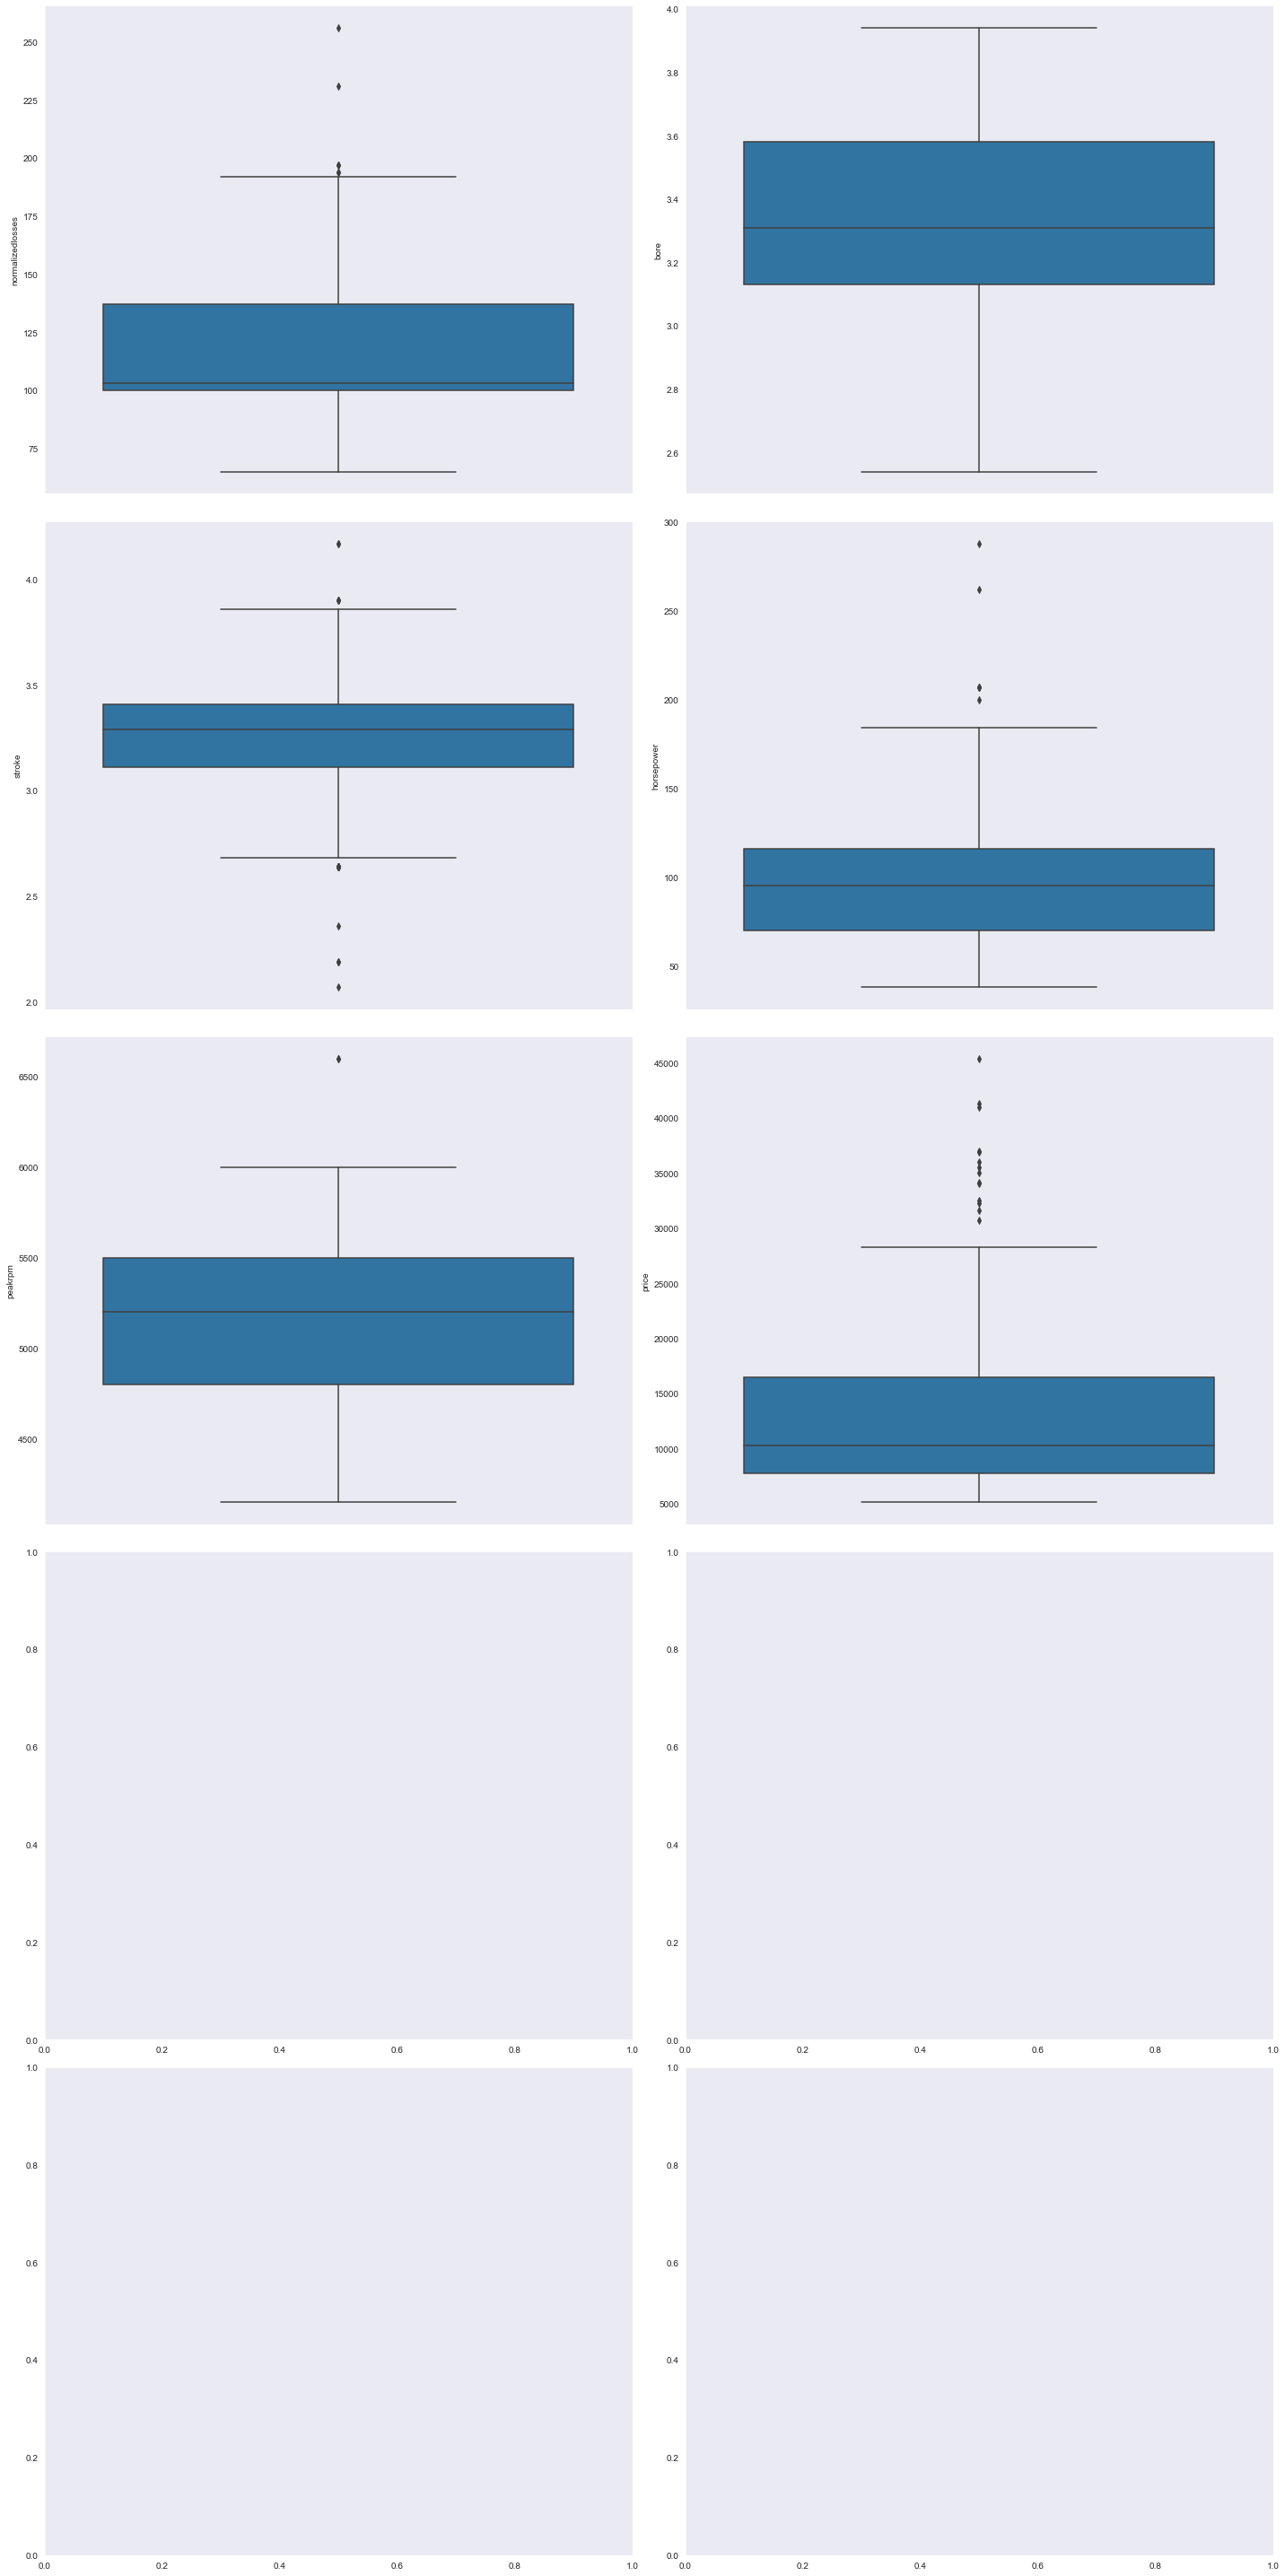

In [45]:
fig = plt.figure(figsize=(20,40))

plt.subplot(5,2,1)
sns.boxplot(y=df.normalizedlosses)
plt.subplot(5,2,2)
sns.boxplot(y=df.bore)
plt.subplot(5,2,3)
sns.boxplot(y=df.stroke)
plt.subplot(5,2,4)
sns.boxplot(y=df.horsepower)
plt.subplot(5,2,5)
sns.boxplot(y=df.peakrpm)
plt.subplot(5,2,6)
sns.boxplot(y=df.price)
plt.subplot(5,2,7)
#sns.boxplot(y=df.compressionratio)
plt.subplot(5,2,8)
#sns.boxplot(y=df.citympg)
plt.subplot(5,2,9)
#sns.boxplot(y=df.highwaympg)
plt.subplot(5,2,10)
#sns.boxplot(y=df.price)

plt.tight_layout()
plt.show()

In [46]:
#Save to csv
#df.to_csv("auto1.csv",index=False)

### Treat Duplicate Values

In [47]:
df.duplicated(keep='first').sum()

0

In [48]:
df[df.duplicated(keep=False)]

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [49]:
#df.drop_duplicates(ignore_index=True, inplace=True)

### Treat Outliers

In [50]:
df2 = pd.read_csv("auto1.csv")

In [51]:
df2

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,100.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,100.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,100.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145.0,idi,3.01,3.40,10.6,106.0,4800.0,26,27,22470


In [52]:
df2.describe()

,symboling,normalizedlosses,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,117.043902,98.710976,174.049268,65.884390,53.724878,2555.565854,124.570732,3.321951,3.257659,9.039122,102.336585,5121.707317,25.219512,30.751220,13150.307317
std,1.245307,31.148530,5.882586,12.337289,2.083114,2.443522,520.680204,33.974343,0.276457,0.313999,0.793356,36.127618,476.562973,6.542142,6.886443,7879.121326
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.400000,38.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,100.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,192.500000,114.250000,208.100000,71.100000,59.800000,4066.000000,207.000000,3.940000,4.170000,10.600000,185.000000,6550.000000,49.000000,54.000000,45400.000000


In [53]:
windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5,
                         variables=['normalizedlosses','wheelbase','width','enginesize','compressionratio',
                                   'horsepower','peakrpm'])

In [54]:
windsorizer.fit(df)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['normalizedlosses', 'wheelbase', 'width', 'enginesize',
                      'compressionratio', 'horsepower', 'peakrpm'])

In [55]:
df2_t = windsorizer.transform(df)

In [56]:
df2_t

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,100.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,100.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,100.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141.0,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141.0,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173.0,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145.0,idi,3.01,3.40,10.6,106.0,4800.0,26,27,22470


In [57]:
df2_t.describe()

,symboling,normalizedlosses,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,117.043902,98.710976,174.049268,65.884390,53.724878,2555.565854,124.570732,3.321951,3.257659,9.039122,102.336585,5121.707317,25.219512,30.751220,13150.307317
std,1.245307,31.148530,5.882586,12.337289,2.083114,2.443522,520.680204,33.974343,0.276457,0.313999,0.793356,36.127618,476.562973,6.542142,6.886443,7879.121326
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.400000,38.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,100.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,192.500000,114.250000,208.100000,71.100000,59.800000,4066.000000,207.000000,3.940000,4.170000,10.600000,185.000000,6550.000000,49.000000,54.000000,45400.000000


In [58]:
windsorizer.left_tail_caps_

{'normalizedlosses': 44.5,
 'wheelbase': 82.64999999999999,
 'width': 59.89999999999998,
 'enginesize': 31.0,
 'compressionratio': 7.399999999999999,
 'horsepower': 1.0,
 'peakrpm': 3750.0}

In [59]:
windsorizer.right_tail_caps_

{'normalizedlosses': 192.5,
 'wheelbase': 114.25000000000001,
 'width': 71.10000000000002,
 'enginesize': 207.0,
 'compressionratio': 10.600000000000001,
 'horsepower': 185.0,
 'peakrpm': 6550.0}

In [60]:
#df2_t.to_csv("auto1.csv",index=False)

### Treat Data Types

In [61]:
df3 = pd.read_csv("auto1.csv")

In [62]:
df3.head()

,symboling,normalizedlosses,make,fueltype,aspiration,numofdoors,bodystyle,drivewheels,enginelocation,wheelbase,length,width,height,curbweight,enginetype,numofcylinders,enginesize,fuelsystem,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,100.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,100.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,100.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   normalizedlosses  205 non-null    float64
 2   make              205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   numofdoors        205 non-null    object 
 6   bodystyle         205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  length            205 non-null    float64
 11  width             205 non-null    float64
 12  height            205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  numofcylinders    205 non-null    object 
 16  enginesize        205 non-null    float64
 1

### Feature Scaling

In [64]:
df3_num = df3[['symboling','normalizedlosses','wheelbase','length', 'width', 'height', 'curbweight', 'enginesize',
             'bore','stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

In [65]:
df3_num

,symboling,normalizedlosses,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,100.0,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,100.0,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,100.0,94.5,171.2,65.5,52.4,2823,152.0,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,99.8,176.6,66.2,54.3,2337,109.0,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,99.4,176.6,66.4,54.3,2824,136.0,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141.0,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141.0,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173.0,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145.0,3.01,3.40,10.6,106.0,4800.0,26,27


In [66]:
scalar = StandardScaler()

In [67]:
df3numscale = scalar.fit_transform(df3_num)

In [68]:
df3numscale

array([[ 1.74347043, -0.54852109, -1.72300535, ..., -0.25601077,
        -0.64655303, -0.54605874],
       [ 1.74347043, -0.54852109, -1.72300535, ..., -0.25601077,
        -0.64655303, -0.54605874],
       [ 0.133509  , -0.54852109, -0.71758985, ..., -0.25601077,
        -0.95301169, -0.69162706],
       ...,
       [-1.47645244, -0.70943527,  1.77038748, ...,  0.79573689,
        -1.10624102, -1.12833203],
       [-1.47645244, -0.70943527,  1.77038748, ..., -0.67670984,
         0.11959362, -0.54605874],
       [-1.47645244, -0.70943527,  1.77038748, ...,  0.58538736,
        -0.95301169, -0.83719538]])

In [69]:
df3numscale = pd.DataFrame(df3numscale,columns=df3_num.columns)

In [70]:
df3numscale

,symboling,normalizedlosses,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,-0.548521,-1.723005,-0.426521,-0.858695,-2.020417,-0.014566,0.160196,0.536833,-1.844185,-0.049433,0.240387,-0.256011,-0.646553,-0.546059
1,1.743470,-0.548521,-1.723005,-0.426521,-0.858695,-2.020417,-0.014566,0.160196,0.536833,-1.844185,-0.049433,0.240387,-0.256011,-0.646553,-0.546059
2,0.133509,-0.548521,-0.717590,-0.231513,-0.184978,-0.543527,0.514882,0.809329,-2.327749,0.677904,-0.049433,1.433526,-0.256011,-0.953012,-0.691627
3,0.938490,1.511180,0.185580,0.207256,0.151880,0.235942,-0.420797,-0.459430,-0.478462,0.454428,1.214121,-0.009339,0.795737,-0.186865,-0.109354
4,0.938490,1.511180,0.117416,0.207256,0.248125,0.235942,0.516807,0.337232,-0.478462,0.454428,-1.312986,0.351377,0.795737,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,-0.709435,1.770387,1.198549,1.451189,0.728239,0.763241,0.484762,1.660909,-0.343702,0.582344,0.323630,0.585387,-0.340094,-0.400490
201,-1.476452,-0.709435,1.770387,1.198549,1.403066,0.728239,0.949992,0.484762,1.660909,-0.343702,-0.428499,1.600011,0.375038,-0.953012,-0.837195
202,-1.476452,-0.709435,1.770387,1.198549,1.451189,0.728239,0.878757,1.428955,0.935698,-1.237607,-0.302143,0.878578,0.795737,-1.106241,-1.128332
203,-1.476452,-0.709435,1.770387,1.198549,1.451189,0.728239,1.273437,0.602787,-1.131152,0.454428,1.972253,0.101650,-0.676710,0.119594,-0.546059


In [71]:
label = df3['price']

In [72]:
label

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

In [73]:
df4 = pd.concat([df3numscale,label],axis=1)

In [74]:
df4

,symboling,normalizedlosses,wheelbase,length,width,height,curbweight,enginesize,bore,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,-0.548521,-1.723005,-0.426521,-0.858695,-2.020417,-0.014566,0.160196,0.536833,-1.844185,-0.049433,0.240387,-0.256011,-0.646553,-0.546059,13495
1,1.743470,-0.548521,-1.723005,-0.426521,-0.858695,-2.020417,-0.014566,0.160196,0.536833,-1.844185,-0.049433,0.240387,-0.256011,-0.646553,-0.546059,16500
2,0.133509,-0.548521,-0.717590,-0.231513,-0.184978,-0.543527,0.514882,0.809329,-2.327749,0.677904,-0.049433,1.433526,-0.256011,-0.953012,-0.691627,16500
3,0.938490,1.511180,0.185580,0.207256,0.151880,0.235942,-0.420797,-0.459430,-0.478462,0.454428,1.214121,-0.009339,0.795737,-0.186865,-0.109354,13950
4,0.938490,1.511180,0.117416,0.207256,0.248125,0.235942,0.516807,0.337232,-0.478462,0.454428,-1.312986,0.351377,0.795737,-1.106241,-1.273900,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,-0.709435,1.770387,1.198549,1.451189,0.728239,0.763241,0.484762,1.660909,-0.343702,0.582344,0.323630,0.585387,-0.340094,-0.400490,16845
201,-1.476452,-0.709435,1.770387,1.198549,1.403066,0.728239,0.949992,0.484762,1.660909,-0.343702,-0.428499,1.600011,0.375038,-0.953012,-0.837195,19045
202,-1.476452,-0.709435,1.770387,1.198549,1.451189,0.728239,0.878757,1.428955,0.935698,-1.237607,-0.302143,0.878578,0.795737,-1.106241,-1.128332,21485
203,-1.476452,-0.709435,1.770387,1.198549,1.451189,0.728239,1.273437,0.602787,-1.131152,0.454428,1.972253,0.101650,-0.676710,0.119594,-0.546059,22470


### Create and save processed dataset

In [75]:
#df4.to_csv("autotrain.csv",index=False)

### Model Training

In [76]:
X = df4.iloc[:,0:15]
y = df4.iloc[:,15]

In [77]:
X.values, y.values

(array([[ 1.74347043, -0.54852109, -1.72300535, ..., -0.25601077,
         -0.64655303, -0.54605874],
        [ 1.74347043, -0.54852109, -1.72300535, ..., -0.25601077,
         -0.64655303, -0.54605874],
        [ 0.133509  , -0.54852109, -0.71758985, ..., -0.25601077,
         -0.95301169, -0.69162706],
        ...,
        [-1.47645244, -0.70943527,  1.77038748, ...,  0.79573689,
         -1.10624102, -1.12833203],
        [-1.47645244, -0.70943527,  1.77038748, ..., -0.67670984,
          0.11959362, -0.54605874],
        [-1.47645244, -0.70943527,  1.77038748, ...,  0.58538736,
         -0.95301169, -0.83719538]]),
 array([13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
        10295, 16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,
         5151,  6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,
         8558,  8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,
         7295,  7895,  9095,  8845, 10295, 12945, 10345,  6785, 10295,
        10295, 110

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 15), (41, 15), (164,), (41,))

In [80]:
xgb = XGBRegressor(random_state=0, n_estimators=300, objective='reg:squarederror')

In [81]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:13861.5
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:12687.5
[2]	validation_0-rmse:11638.3
[3]	validation_0-rmse:10709.1
[4]	validation_0-rmse:9918.79
[5]	validation_0-rmse:9208.55
[6]	validation_0-rmse:8582.33
[7]	validation_0-rmse:8044.13
[8]	validation_0-rmse:7570.26
[9]	validation_0-rmse:7138.37
[10]	validation_0-rmse:6759.58
[11]	validation_0-rmse:6428.11
[12]	validation_0-rmse:6150.42
[13]	validation_0-rmse:5892.65
[14]	validation_0-rmse:5674.37
[15]	validation_0-rmse:5494.69
[16]	validation_0-rmse:5376.87
[17]	validation_0-rmse:5280.68
[18]	validation_0-rmse:5219.72
[19]	validation_0-rmse:5158.7
[20]	validation_0-rmse:5113.1
[21]	validation_0-rmse:5075
[22]	validation_0-rmse:5045.87
[23]	validation_0-rmse:5001.12
[24]	validation_0-rmse:4974.58
[25]	validation_0-rmse:4972.42
[26]	validation_0-rmse:4919.46
[27]	validation_0-rmse:4899.84
[28]	validation_0-rmse:4899.39
[29]	validation_0-rmse:4891.08
[30]	validation_0-rm

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [82]:
y_pred = xgb.predict(X_test)

In [83]:
y_pred

array([ 6273.1113, 16191.716 , 11553.166 ,  6273.1113,  9344.371 ,
       12893.891 ,  6273.1113,  7058.636 , 15642.504 ,  6399.69  ,
       18466.291 , 33698.8   , 11491.601 , 12691.392 ,  6273.1113,
       12582.979 , 11967.3125, 16540.648 ,  7738.7534,  6531.533 ,
        9780.23  , 13992.605 ,  8937.952 , 12893.891 , 16602.87  ,
        6843.128 ,  7175.319 , 14103.862 ,  7175.319 ,  6960.6772,
        7655.9546, 11767.123 , 16225.9   , 10152.293 ,  6960.6772,
       30437.064 ,  7965.2017, 16035.648 ,  6273.1113, 34009.105 ,
        6273.1113], dtype=float32)

### Model Evaluation

In [84]:
mse = mean_squared_error(y_test,y_pred)
mse

23922676.63640023

In [85]:
rmse = np.sqrt(mse)
rmse

4891.081336105568

In [86]:
r2score = r2_score(y_test,y_pred)
r2score

0.6524240772738423

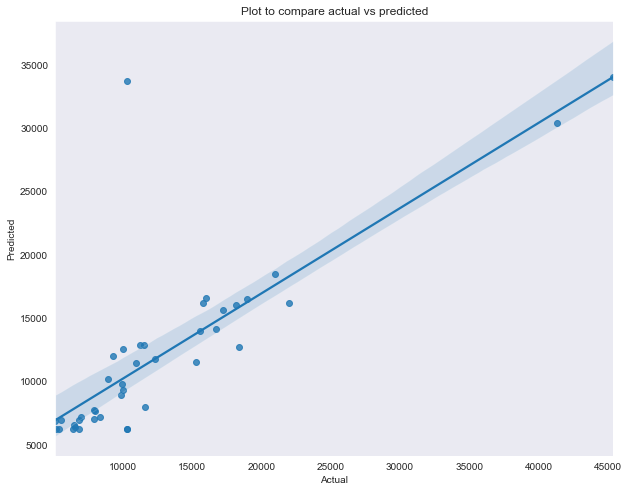

In [87]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

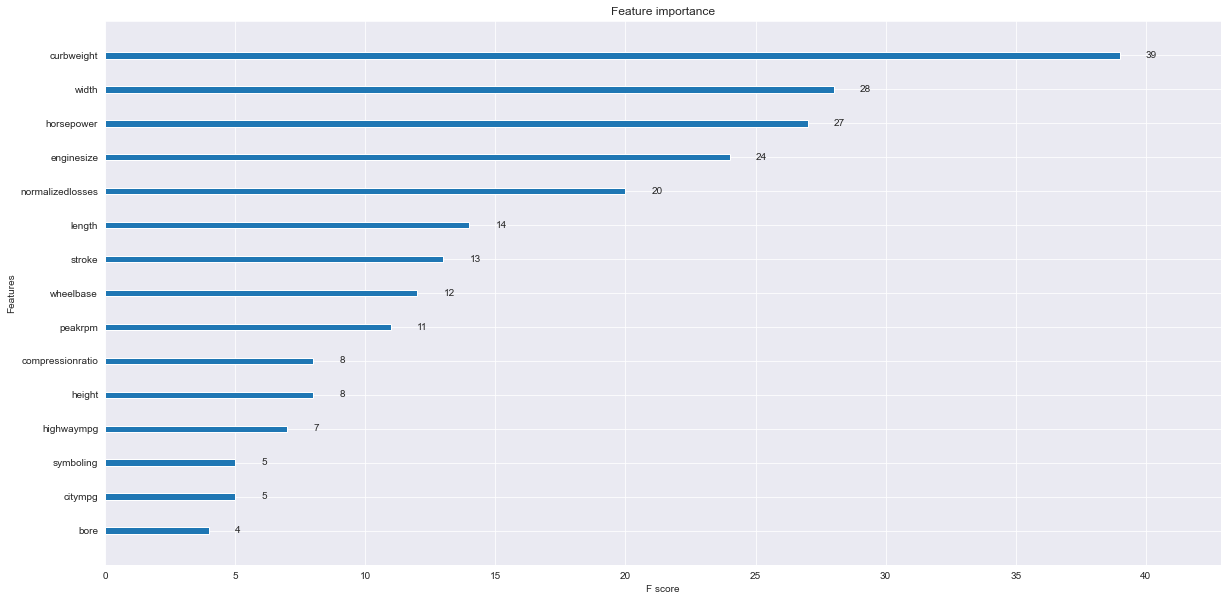

In [88]:
fig, ax = plt.subplots(figsize=(20,10))
plot_importance(xgb,ax=ax)
plt.show()

### Cross-Validation

In [89]:
cv = cross_val_score(xgb,X,y,cv=5,verbose=2)
cv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.7s finished


array([ 0.80194922,  0.58149572, -0.40495462,  0.54636898,  0.63511027])

In [90]:
cv.mean()

0.4319939122361576

### Model Prediction

### Model Tuning

In [91]:
model = XGBRegressor(objective='reg:squarederror')

In [92]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [93]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 50, n_jobs=-1)

In [94]:
randm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squarederror',
                                          random_state=0, reg_...
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                           

In [95]:
randm.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=14,
             importance_type='gain', learning rate=0.14, learning_rate=0.1,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
             n_estimators=300, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.7999999999999999, verbosity=1)

In [96]:
randm.best_score_

0.921996585942846

In [97]:
randm.best_params_

{'subsample': 0.7999999999999999,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning rate': 0.14,
 'gamma': 14,
 'colsample_bytree': 0.7}

### New Model

In [98]:
X = df4.iloc[:,0:15]
y = df4.iloc[:,15]

In [99]:
X.values,y.values

(array([[ 1.74347043, -0.54852109, -1.72300535, ..., -0.25601077,
         -0.64655303, -0.54605874],
        [ 1.74347043, -0.54852109, -1.72300535, ..., -0.25601077,
         -0.64655303, -0.54605874],
        [ 0.133509  , -0.54852109, -0.71758985, ..., -0.25601077,
         -0.95301169, -0.69162706],
        ...,
        [-1.47645244, -0.70943527,  1.77038748, ...,  0.79573689,
         -1.10624102, -1.12833203],
        [-1.47645244, -0.70943527,  1.77038748, ..., -0.67670984,
          0.11959362, -0.54605874],
        [-1.47645244, -0.70943527,  1.77038748, ...,  0.58538736,
         -0.95301169, -0.83719538]]),
 array([13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
        10295, 16430, 16925, 20970, 21105, 24565, 30760, 41315, 36880,
         5151,  6295,  6575,  5572,  6377,  7957,  6229,  6692,  7609,
         8558,  8921, 12964,  6479,  6855,  5399,  6529,  7129,  7295,
         7295,  7895,  9095,  8845, 10295, 12945, 10345,  6785, 10295,
        10295, 110

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
xgbnew = XGBRegressor(random_state=0, n_estimators=300, objective='reg:squarederror',max_depth=7,
                      gamma=30, min_child_weight=2, subsample=0.5,colsample_bytree=0.6)

In [102]:
xgbnew.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:13885.2
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:12765.7
[2]	validation_0-rmse:11712.7
[3]	validation_0-rmse:10866.8
[4]	validation_0-rmse:10065.6
[5]	validation_0-rmse:9376.18
[6]	validation_0-rmse:8786.65
[7]	validation_0-rmse:8280.76
[8]	validation_0-rmse:7805.91
[9]	validation_0-rmse:7399.22
[10]	validation_0-rmse:6976.7
[11]	validation_0-rmse:6616.26
[12]	validation_0-rmse:6320.48
[13]	validation_0-rmse:6068.06
[14]	validation_0-rmse:5867.35
[15]	validation_0-rmse:5695.79
[16]	validation_0-rmse:5532.82
[17]	validation_0-rmse:5361.67
[18]	validation_0-rmse:5279.71
[19]	validation_0-rmse:5176.46
[20]	validation_0-rmse:5090.92
[21]	validation_0-rmse:5055.35
[22]	validation_0-rmse:5000.12
[23]	validation_0-rmse:4968.87
[24]	validation_0-rmse:4952.31
[25]	validation_0-rmse:4910.64
[26]	validation_0-rmse:4903.23
[27]	validation_0-rmse:4896.14
[28]	validation_0-rmse:4916.14
[29]	validation_0-rmse:4896.05
[30]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=30,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=2, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.5, verbosity=1)

In [103]:
y_pred_new = xgbnew.predict(X_test)

In [104]:
y_pred_new

array([ 5937.32  , 16384.672 , 13432.035 ,  5652.481 , 10323.757 ,
       12023.222 ,  6223.0254,  6979.409 , 17408.879 ,  6579.9795,
       18112.877 , 34684.43  , 12229.033 , 12498.892 ,  5969.059 ,
       11276.672 , 11160.064 , 18168.9   ,  8313.895 ,  6243.0425,
        9042.305 , 14680.837 ,  9101.527 , 12186.812 , 16692.393 ,
        6672.991 ,  7396.127 , 14987.326 ,  7554.3066,  6675.4346,
        8051.18  , 12282.417 , 15189.588 ,  9947.728 ,  7113.0107,
       30339.068 ,  8410.518 , 15563.691 ,  5741.9746, 35820.67  ,
        5706.943 ], dtype=float32)

In [105]:
r2_score(y_test,y_pred_new)

0.6528947870760307